<a href="https://colab.research.google.com/github/Arman-1994/Experimental-Place/blob/master/Amazon_Recommendation_Text_Based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Import Libraries


In [2]:
#import all the necessary packages.
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout
nltk.download('stopwords')

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Read Dataset

In [0]:
data = pd.read_json("/content/drive/My Drive/Colab Notebooks/Workshops/Applied_AI_Workshop_Code_Data/tops_fashion.json")

In [4]:
data.head()

,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
0,None,B016I2TS4W,SHIRT,None,None,None,FNC7C,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Women's O Nec...,Minions Como Superheroes Ironman Long Sleeve R...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
1,None,B01N49AI08,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Izo Tunic,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
2,None,B01JDPCOHO,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Won Top,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
3,None,B01N19U5H5,SHIRT,None,None,None,Focal18,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,100% Brand New & Fashion<br> Quantity: 1 Piece...,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
4,None,B004GSI2OS,SHIRT,$26.26,None,Onyx Black/ Stone,FeatherLite,None,Usually ships in 6-10 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,,Featherlite Ladies' Long Sleeve Stain Resistan...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN


# EDA


In [5]:
print("Number of Datapoints",data.shape[0])
print("Number of Feature variables",data.shape[1])

Number of Datapoints 183138
Number of Feature variables 19


In [6]:
data.columns

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

Of these 19 features, we will be using only 6 features. 
1. asin ( Amazon standard identification number) 
2. brand ( brand to which the product belongs to ) 
3. color ( Color information of apparel, it can contain many colors as a value ex: red and black stripes ) 
4. product_type_name (type of the apperal, ex: SHIRT/TSHIRT ) 
5. medium_image_url ( url of the image ) 
6. title (title of the product.) 
7. formatted_price (price of the product)

In [0]:
# Taking only our columns of interest into consideratation
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

In [8]:
print("Number of Datapoints",data.shape[0])
print("Number of Feature variables",data.shape[1])

Number of Datapoints 183138
Number of Feature variables 7


In [9]:
data.head(2)

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None


## Accounting Missing Values

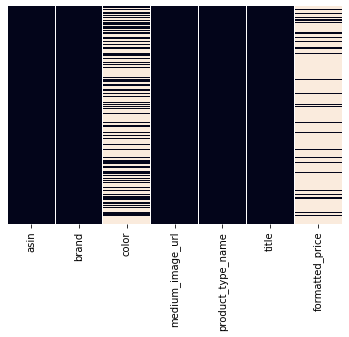

In [10]:
# visualising Missing Data
import seaborn as sns
sns.heatmap(data.isnull(),cbar=None,yticklabels=False)

In [11]:
# Missing Values in Columns in percentages
( data.isnull().sum() / data.shape[0] * 100 ).sort_values()

asin                  0.000000
medium_image_url      0.000000
product_type_name     0.000000
title                 0.000000
brand                 0.082451
color                64.531665
formatted_price      84.495299
dtype: float64

## EDA - Product Type column

In [12]:
data["product_type_name"].describe()
# All we get to know is there are 72 unique variables in product type

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object

In [13]:
# Checking top 10 frequent categorical variables
data["product_type_name"].value_counts()[:10]

SHIRT                         167794
APPAREL                         3549
BOOKS_1973_AND_LATER            3336
DRESS                           1584
SPORTING_GOODS                  1281
SWEATER                          837
OUTERWEAR                        796
OUTDOOR_RECREATION_PRODUCT       729
ACCESSORY                        636
UNDERWEAR                        425
Name: product_type_name, dtype: int64

In [14]:
# Checking top 10 frequent categorical variables in terms of percentage
data["product_type_name"].value_counts()[:10] / data.shape[0] * 100

SHIRT                         91.621619
APPAREL                        1.937883
BOOKS_1973_AND_LATER           1.821577
DRESS                          0.864922
SPORTING_GOODS                 0.699473
SWEATER                        0.457032
OUTERWEAR                      0.434645
OUTDOOR_RECREATION_PRODUCT     0.398060
ACCESSORY                      0.347279
UNDERWEAR                      0.232065
Name: product_type_name, dtype: float64

In [0]:
# # Visualing the column to make some conclusions
# sns.countplot(x=data["product_type_name"])

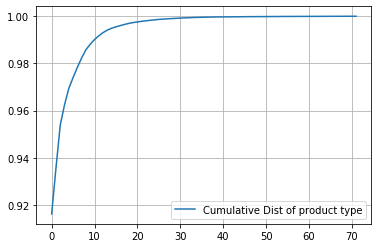

In [16]:
# as in the above figure we were not able to interpret the distribution  we go for CDF to understand the dist in better way
size = data.shape[0]
h = (data["product_type_name"].value_counts().values) / size
c = np.cumsum(h)
plt.plot(c,label="Cumulative Dist of product type")
plt.grid()
plt.legend()
plt.show()

Our Finding,
Top 10 frequent labels contribute to 99% of data

## EDA - Brand column

In [17]:
data["brand"].describe()
# All we get to know is there are 10577 unique variables in product type

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object

In [18]:
# No of records for which brand is missing
data["brand"].isnull().sum()

151

In [19]:
 # Checking top 15 frequent categorical variables
data["brand"].value_counts()[:15]

Zago                         223
XQS                          222
Yayun                        215
YUNY                         198
XiaoTianXin-women clothes    193
Generic                      192
Boohoo                       190
Alion                        188
TheMogan                     187
Abetteric                    187
xiaokong                     186
Sheng XiWomen                185
UUYUK                        185
TOOGOO(R)                    184
WILLTOO                      184
Name: brand, dtype: int64

In [20]:
 # Checking least 15 frequent categorical variables
data["brand"].value_counts()[-15:]

1game Of Thrones Special Goods    1
Pink Drop                         1
Houston Strong t shirt            1
ITZON                             1
ONE X ONE TEASPOON                1
Flesser                           1
Southern Attitudee                1
Essue                             1
TinkerBell                        1
Liz Alig                          1
Wakrays                           1
williams martini                  1
Dept 222                          1
Baseball T shirt abrek            1
ALOQ Fashion                      1
Name: brand, dtype: int64

In [21]:
# Checking top 15 frequent categorical variables in terms of percentage
data["brand"].value_counts()[:15] / data.shape[0] * 100

Zago                         0.121766
XQS                          0.121220
Yayun                        0.117398
YUNY                         0.108115
XiaoTianXin-women clothes    0.105385
Generic                      0.104839
Boohoo                       0.103747
Alion                        0.102655
TheMogan                     0.102109
Abetteric                    0.102109
xiaokong                     0.101563
Sheng XiWomen                0.101017
UUYUK                        0.101017
TOOGOO(R)                    0.100471
WILLTOO                      0.100471
Name: brand, dtype: float64

In [0]:
# # Visualing the column to make some conclusions
# sns.countplot(x=data["brand"])

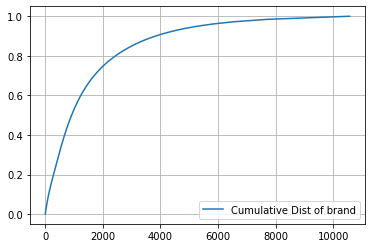

In [23]:
# as in the above figure we were not able to interpret the distribution  we go for CDF to understand the dist in better way
size = data.shape[0]
h = (data["brand"].value_counts().values) / size
c = np.cumsum(h)
plt.plot(c,label="Cumulative Dist of brand")
plt.grid()
plt.legend()
plt.show()

In [0]:
brand_count = Counter(list(data["brand"])) # as dict in variable brand_count

In [25]:
brand_count.most_common(15) # returns top 15 frequent values

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187),
 ('xiaokong', 186),
 ('Sheng XiWomen', 185),
 ('UUYUK', 185),
 ('Splendid', 184),
 ('TOOGOO(R)', 184)]

## EDA - Color Column

In [26]:
data["color"].describe()
# All we get to know is there are 7380 unique variables in product type

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object

In [27]:
# Records for which data is present
data["color"].describe()["count"] / data.shape[0] * 100

35.468335353667726

In [28]:
# No of records for which color is missing
data["color"].isnull().sum()

118182

In [29]:
 # Checking top 15 frequent categorical variables
data["color"].value_counts()[:15]

Black     13207
White      8616
Blue       3570
Red        2289
Pink       1842
Grey       1499
*          1388
Green      1258
Multi      1203
Gray       1189
Purple      951
Navy        846
Brown       561
Yellow      527
Orange      524
Name: color, dtype: int64

In [30]:
 # Checking least 15 frequent categorical variables
data["color"].value_counts()[-15:]

Cat and Dog Portrait                                  1
Flower Black                                          1
Bright Grape/Metallic Silver                          1
Washed Black Silk                                     1
Polka Dot, Black                                      1
Black, White, Blue, Gray                              1
Core Navy                                             1
White/Multi Palm Logo                                 1
Green Camouflage                                      1
Bluemagenta                                           1
Primrose Pink                                         1
Ocean, Pick Stitch                                    1
Steel Heather                                         1
Polychromatic                                         1
Black,Forest Green,Gold,Kelly Green,Maroon,Purple,    1
Name: color, dtype: int64

In [31]:
# Checking top 15 frequent categorical variables in terms of percentage
data["color"].value_counts()[:15] / data.shape[0] * 100

Black     7.211502
White     4.704649
Blue      1.949350
Red       1.249877
Pink      1.005799
Grey      0.818508
*         0.757898
Green     0.686914
Multi     0.656882
Gray      0.649237
Purple    0.519281
Navy      0.461947
Brown     0.306326
Yellow    0.287761
Orange    0.286123
Name: color, dtype: float64

very strange to see '*' as colour, moreover its 0.75 % times occured. ie 1388 no of times.

In [0]:
# # Visualing the column to make some conclusions
# sns.countplot(x=data["color"])

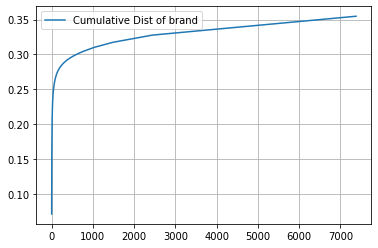

In [33]:
# as in the above figure we were not able to interpret the distribution  
# we go for CDF to understand the dist in better way
size = data.shape[0]
h = (data["color"].value_counts().values) / size
c = np.cumsum(h)
plt.plot(c,label="Cumulative Dist of brand")
plt.grid()
plt.legend()
plt.show()

## EDA - Price Column ( formatted_price )

In [34]:
data["formatted_price"].describe()

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object

In [35]:
print("NO of records with missing prices",data["formatted_price"].isnull().sum() )
print("% of records for which words are missing", round(data["formatted_price"].isnull().sum() /data.shape[0]*100))

NO of records with missing prices 154743
% of records for which words are missing 84.0


In [36]:
data["formatted_price"].value_counts()

$19.99     945
$9.99      749
$9.50      601
$14.99     472
$7.50      463
          ... 
$224.99      1
$11.52       1
$22.17       1
$12.28       1
$10.12       1
Name: formatted_price, Length: 3135, dtype: int64

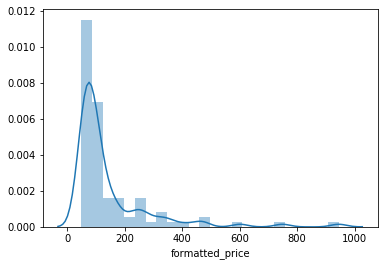

In [37]:
sns.distplot( data["formatted_price"].value_counts()[:100] )

In [38]:
# Supproting figures for above plot
data["formatted_price"].value_counts().astype(int).describe()

count    3135.000000
mean        9.057416
std        36.226058
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       945.000000
Name: formatted_price, dtype: float64

In [39]:
# Max Price
max(data["formatted_price"].value_counts().astype(int))

945

In [40]:
# Min Price
min(data["formatted_price"].value_counts().astype(int))

1

In [41]:
data["formatted_price"].value_counts().astype(int).describe()

count    3135.000000
mean        9.057416
std        36.226058
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       945.000000
Name: formatted_price, dtype: float64

## EDA - Title 

In [42]:
data["title"].describe()

# reveals that for 183138 data points title is present

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object

In [43]:
print("No of unique label is",data["title"].nunique())

No of unique label is 175985


In [44]:
data["title"].value_counts()[:10]

Nakoda Cotton Self Print Straight Kurti For Women                                77
Q-rious Women's Racerback Cotton Lycra Camsioles                                 56
FINEJO Casual Women Long Sleeve Lace Irregular Hem Blouse Tops                   47
Girlzwalk Women Cami Sleeveless Printed Swing Vest Top Plus Sizes                44
ELINA FASHION Women's Indo-Western Tunic Top Cotton Kurti                        43
Victoria Scoop Neck Front Lace Floral High-Low Top in 4 Sizes                    40
Cenizas Women's Indian Tunic Top Cotton Kurti                                    39
Indistar Womens Premium Cotton Half Sleeves Printed T-Shirts/Tops (Pack of 3)    37
Rajnandini Women's Cotton Printed Kurti                                          35
Long Sleeve Mock Neck Top                                                        32
Name: title, dtype: int64

# Missing Values Treatment


In [0]:
data = data[~data["formatted_price"].isnull()]

In [46]:
data.shape

(28395, 7)

In [47]:
data = data[~data["color"].isnull()]
data.shape

(28385, 7)

# Handle Duplicates Data

In [48]:
# No of products that have same title
data.duplicated("title").sum()

2325

In [49]:
# No of products that have same title as well as brand
data.duplicated(["title","brand"]).sum()

2295

In [50]:
# No of products that have same title, brand, color
data.duplicated(["title","brand","color"]).sum()

1646

In [51]:
# No of products that have same title, brand, color
data.duplicated(["title","brand","color","product_type_name"]).sum()

1636

In [52]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
11,B001LOUGE4,Fitness Etc.,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,Ladies Cotton Tank 2x1 Ribbed Tank Top,$11.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
21,B014ICEDNA,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel Short...,$7.50


In [53]:
"""
How can a title be same??
 1. Assume if there is a shirt , for that shirt 4 sizes are available 
in such a case the product will be with 3 differeent ids but may be 
with same title.

 2. Also assume if there is a shirt for which few variants in terms of
colours are available then in such a case the product with different colours 
will have same titles

Also note that it may differ from company to company.
"""

'\nHow can a title be same??\n 1. Assume if there is a shirt , for that shirt 4 sizes are available \nin such a case the product will be with 3 differeent ids but may be \nwith same title.\n\n 2. Also assume if there is a shirt for which few variants in terms of\ncolours are available then in such a case the product with different colours \nwill have same titles\n\nAlso note that it may differ from company to company.\n'

In [0]:
title_length = [len(x.split()) for x in data["title"]]

In [55]:
# length of first title
title_length[0]

13

In [56]:
# Verify the length
data["title"].values[0]

"Featherlite Ladies' Long Sleeve Stain Resistant Tapered Twill Shirt, 2XL, Onyx Black/ Stone"

In [57]:
# checking for max length and min length of title
print("max length: ",max(title_length))
print("min length: ",min(title_length))

max length:  25
min length:  1


In [58]:
# check the min length title
data["title"].values[np.argmin(title_length)]

'Felina'

In [59]:
# check the max length title
data["title"].values[np.argmax(title_length)]

'Pampered Pets Ladies\' Baby Rib Spaghetti Strap Tank Top - Large - Lilac w/Logo & "My Dog Is Treated Better Than I Am" on back'

In [60]:
sorted_data = data.sort_values('title',ascending=False)
sorted_data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
61973,B06Y1KZ2WB,Éclair,Black/Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
133820,B010RV33VE,xiaoming,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32


In [0]:
# non_duplicate_asins=[]
# for i in range(sorted_data.shape[0]):
#   for j in range(i,sorted_data.shape[0]):
#     a = sorted_data["title"].values[i].split()
#     b = sorted_data["title"].values[j].split()
#     if len(a) > len(b):
#       max_len, min_len = a ,b
#     elif len(b)> len(a):
#       max_len, min_len = b, a
#     else:
#       max_len, min_len = a ,b
#     result = list(set(max_len) - set(min_len))
#     if len(result)>2:
#       non_duplicate_asins.append(sorted_data["asin"].values[i])

In [0]:
# len(non_duplicate_asins)  

In [0]:
# set(non_duplicate_asins)

# Text Preprocessing

## Text Cleaning

In [0]:
stop_words = set(stopwords.words('english'))

In [0]:

def nlp_preprocessing(total_text, index, column):
  if type(total_text) is not int:
    string = ""
    for words in total_text.split():
      # remove special characters
      word = (''.join(e for e in string if e.isalnum()))
      # to lower case
      word = word.lower()
      # stop-word removal
      if word not in stop_words:
        string += word + " "
    data[column][index] = string

In [0]:

# we take each title and we text-preprocess it.
for index, row in sorted_data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')


In [67]:
sorted_data.shape

(28385, 7)

In [0]:
cleaned_data = sorted_data.copy()

In [69]:
cleaned_data["title"].values[:10]

array(["Éclair Women's Printed Thin Strap Blouse Black - Junior XL",
       'xiaoming Womens Sleeveless Loose Long T-shirts Top Blouse Shirts',
       "xiaoming Women's White Long Sleeve Single Breast Loose Cotton Linen Blouse Shirt",
       'xiaoming Stripes Tank Patch/Bear Sleeve Anchor Short Embellishment Top Red Ancho',
       'xiaoming Sleeve Sheer Loose Tassel Kimono Woman Chiffon Cardigan Blouse White On',
       'xiaoming Sleeve Plaid Checked Casual Tops Shirt Women Loose T Long Blouse Red+Gr',
       "xiaoming Shirt Black Blouse Casual Oversized Women's T Loose Large Tops Figure C",
       'xiaoming Casual Women Long Loose Sleeve Shirt Neck Draped Blouse Yellow Large /',
       'xiaoming Casual Sleeve Womens Shirt Lace Chiffon Short Top Yellow Medium / US4-U',
       'xiaoming Blazer Womens Style Cape Hippie Loose Kimono Jacket red+whtie L US6'],
      dtype=object)

# Reusabale Code

In [0]:
# Utility Functions which we will use through the rest of the workshop.


#Display an image
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)
  
#plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

## Bag Of Words

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
title_vect = CountVectorizer()
title_features = title_vect.fit_transform(cleaned_data["title"])

In [72]:
title_features.shape

(28385, 11752)

In [73]:
type(title_features)

scipy.sparse.csr.csr_matrix

In [0]:
data = sorted_data.copy()

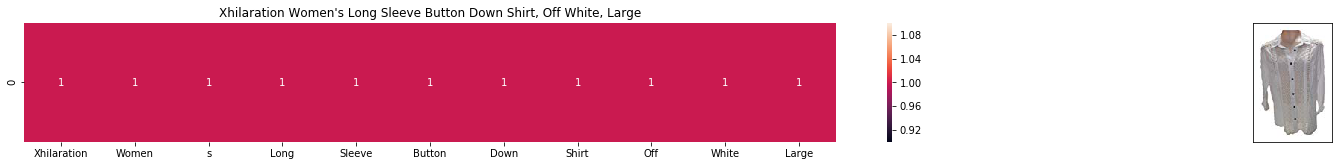

ASIN : B06Y1KHL41
Brand: Xhilaration
Title: Xhilaration Women's Long Sleeve Button Down Shirt, Off White, Large
Euclidean similarity with the query image : 0.0


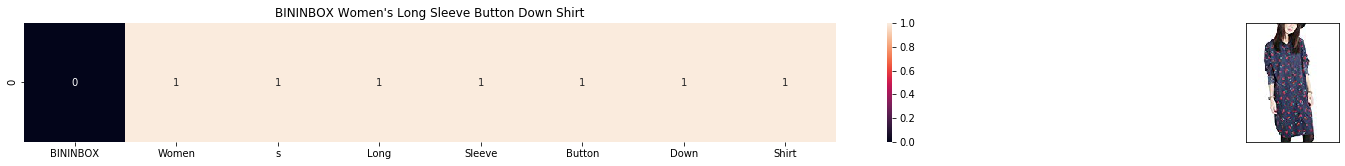

ASIN : B00UD0XQFI
Brand: BININBOX
Title: BININBOX Women's Long Sleeve Button Down Shirt
Euclidean similarity with the query image : 2.23606797749979


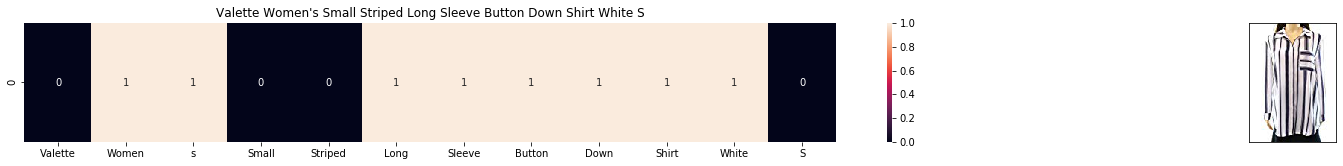

ASIN : B0731F6TPN
Brand: Valette
Title: Valette Women's Small Striped Long Sleeve Button Down Shirt White S
Euclidean similarity with the query image : 2.449489742783178


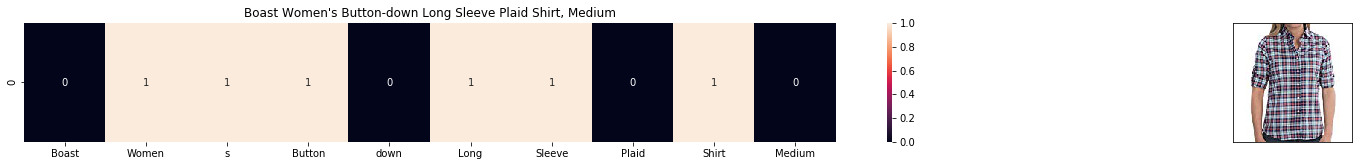

ASIN : B01577SDXG
Brand: Boast
Title: Boast Women's Button-down Long Sleeve Plaid Shirt, Medium
Euclidean similarity with the query image : 2.6457513110645907


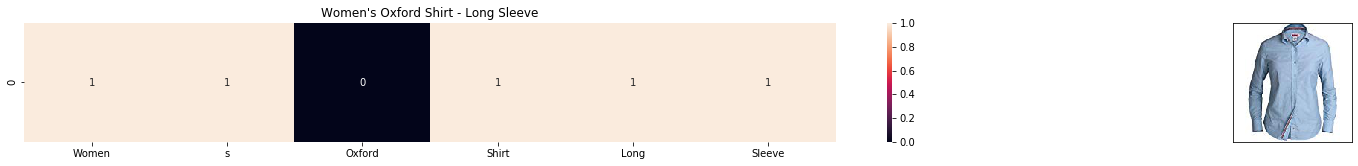

ASIN : B01577JZOC
Brand: Boast
Title: Women's Oxford Shirt - Long Sleeve
Euclidean similarity with the query image : 2.6457513110645907


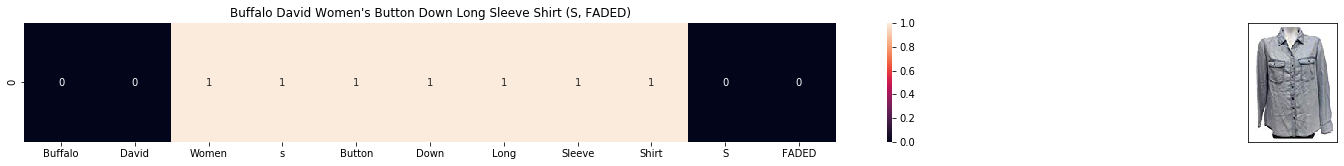

ASIN : B01M0OPK9Q
Brand: Buffalo
Title: Buffalo David Women's Button Down Long Sleeve Shirt (S, FADED)
Euclidean similarity with the query image : 2.6457513110645907


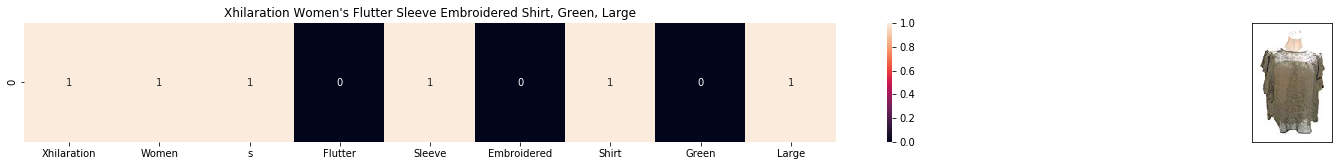

ASIN : B072M9RP4C
Brand: Xhilaration
Title: Xhilaration Women's Flutter Sleeve Embroidered Shirt, Green, Large
Euclidean similarity with the query image : 2.8284271247461903


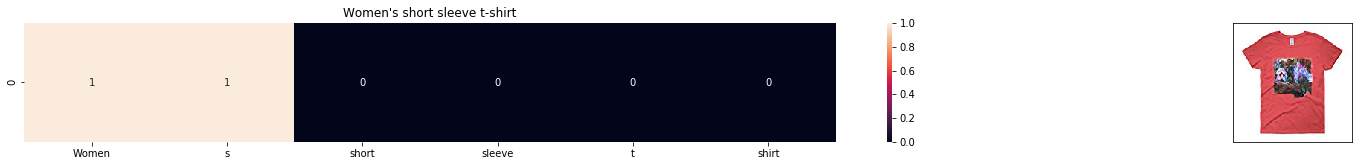

ASIN : B073WVHG2T
Brand: Starchild's Designs
Title: Women's short sleeve t-shirt
Euclidean similarity with the query image : 2.8284271247461903


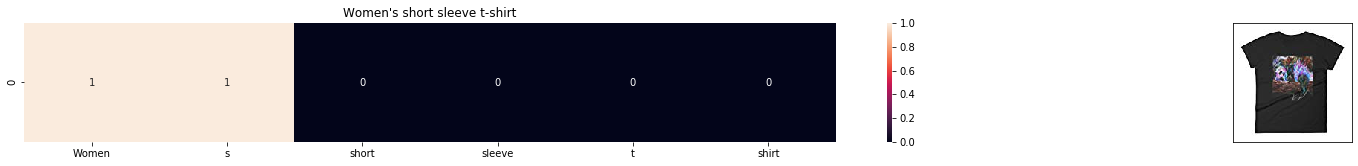

ASIN : B073WVVTB4
Brand: Starchild's Designs
Title: Women's short sleeve t-shirt
Euclidean similarity with the query image : 2.8284271247461903


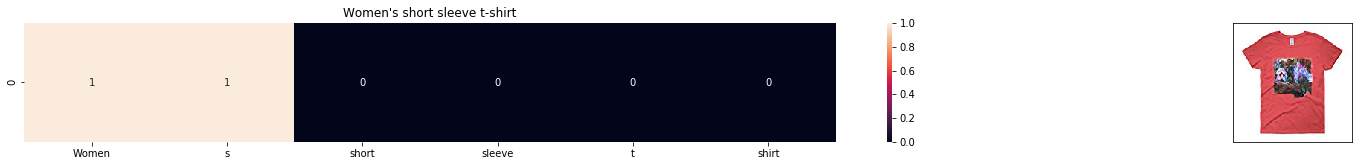

ASIN : B073WVHSBX
Brand: Starchild's Designs
Title: Women's short sleeve t-shirt
Euclidean similarity with the query image : 2.8284271247461903


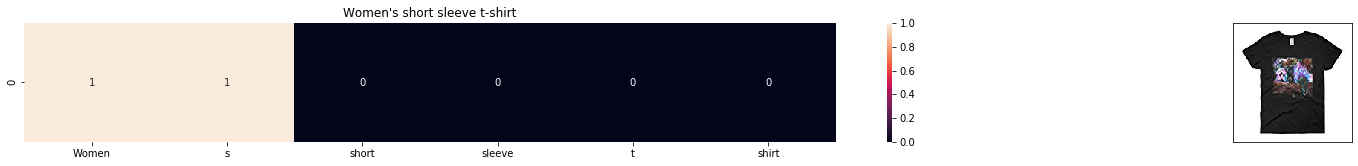

ASIN : B073WVBCHZ
Brand: Starchild's Designs
Title: Women's short sleeve t-shirt
Euclidean similarity with the query image : 2.8284271247461903


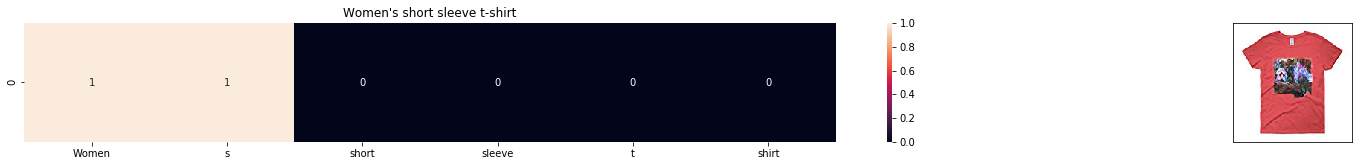

ASIN : B073WVNXXF
Brand: Starchild's Designs
Title: Women's short sleeve t-shirt
Euclidean similarity with the query image : 2.8284271247461903


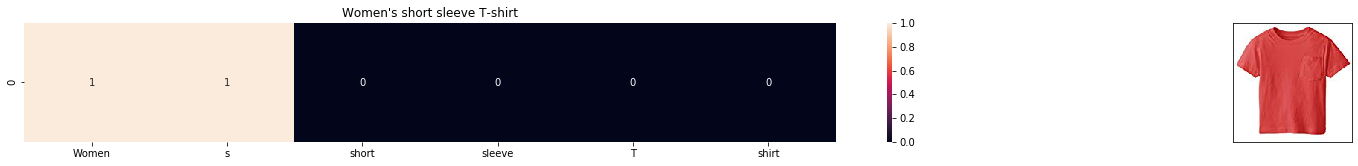

ASIN : B074MPHZNM
Brand: Magic
Title: Women's short sleeve T-shirt
Euclidean similarity with the query image : 2.8284271247461903


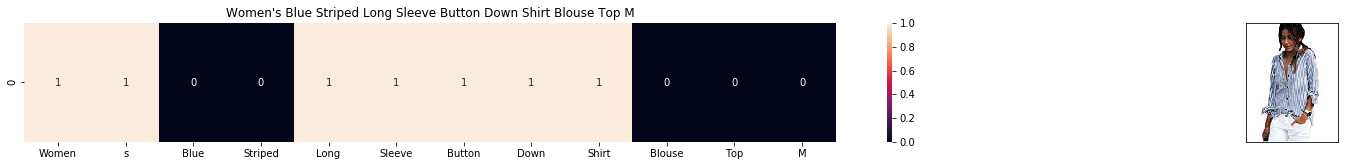

ASIN : B01KM2ONUI
Brand: Voguegirl
Title: Women's Blue Striped Long Sleeve Button Down Shirt Blouse Top M
Euclidean similarity with the query image : 2.8284271247461903


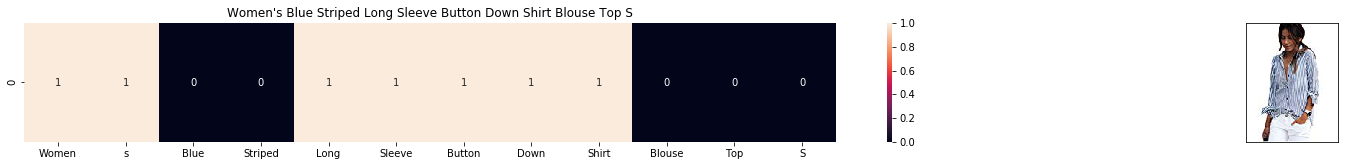

ASIN : B01KM2OLIW
Brand: Voguegirl
Title: Women's Blue Striped Long Sleeve Button Down Shirt Blouse Top S
Euclidean similarity with the query image : 2.8284271247461903


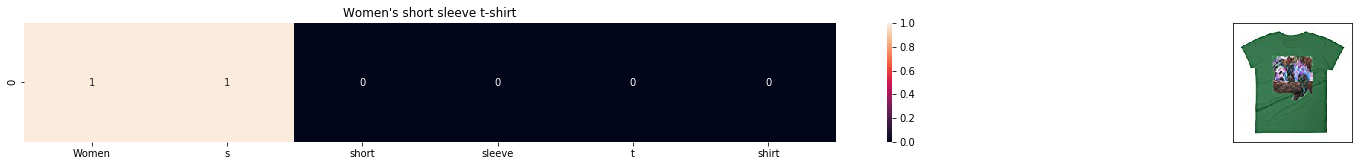

ASIN : B073WVPHL9
Brand: Starchild's Designs
Title: Women's short sleeve t-shirt
Euclidean similarity with the query image : 2.8284271247461903


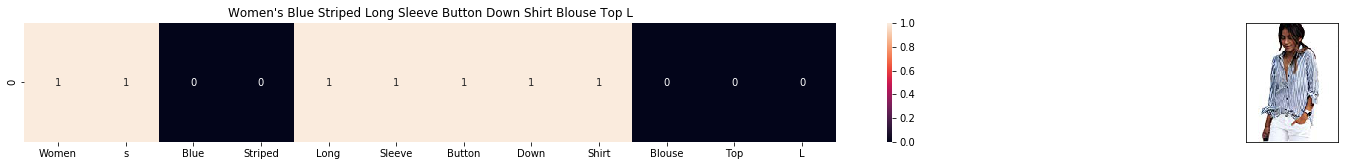

ASIN : B01KM2OQH8
Brand: Voguegirl
Title: Women's Blue Striped Long Sleeve Button Down Shirt Blouse Top L
Euclidean similarity with the query image : 2.8284271247461903


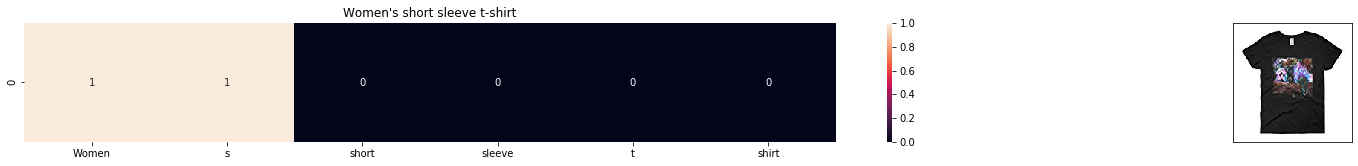

ASIN : B073WVCY16
Brand: Starchild's Designs
Title: Women's short sleeve t-shirt
Euclidean similarity with the query image : 2.8284271247461903


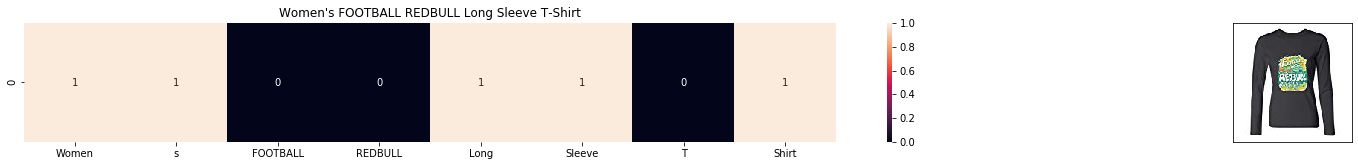

ASIN : B01LXKMS34
Brand: Cloud Space
Title: Women's FOOTBALL REDBULL Long Sleeve T-Shirt
Euclidean similarity with the query image : 2.8284271247461903


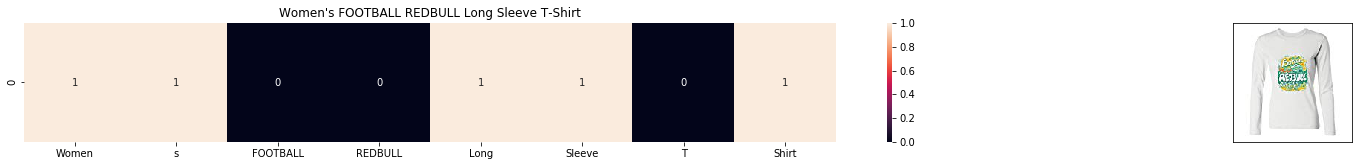

ASIN : B01M1RN1UQ
Brand: Cloud Space
Title: Women's FOOTBALL REDBULL Long Sleeve T-Shirt
Euclidean similarity with the query image : 2.8284271247461903


In [75]:
def bag_of_words_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

#call the bag-of-words model for a product to get similar products.
bag_of_words_model(931, 20) # change the index if you want to.
# In the output heat map each value represents the count value 
# of the label word, the color represents the intersection 
# with inputs title.

#try 12566
#try 931